In [1]:
import numpy as np 
import numpy.random as npr
import matplotlib.pyplot as plt
from scipy.optimize import fmin
from IPython.display import Image

In [2]:
# parameters of the stock and the option 
S0 = 1.00
r = 0.06
sigma = 0.15
T = 3
K = 1.10   

In [3]:
# numeric parameters - number of intervals, number of samples, random numbers 
N = 250
h = T/N 
M = 50000
S = S0*np.ones([M,N+1])
Z = npr.randn(M,N)

In [4]:
# generate price paths using the GBM formula
for n in range(0,N): 
    tem =(r-sigma**2/2)*h + np.sqrt(h)*sigma*Z[:,n] 
    S[:,n+1]=S[:,n]*np.exp(tem)

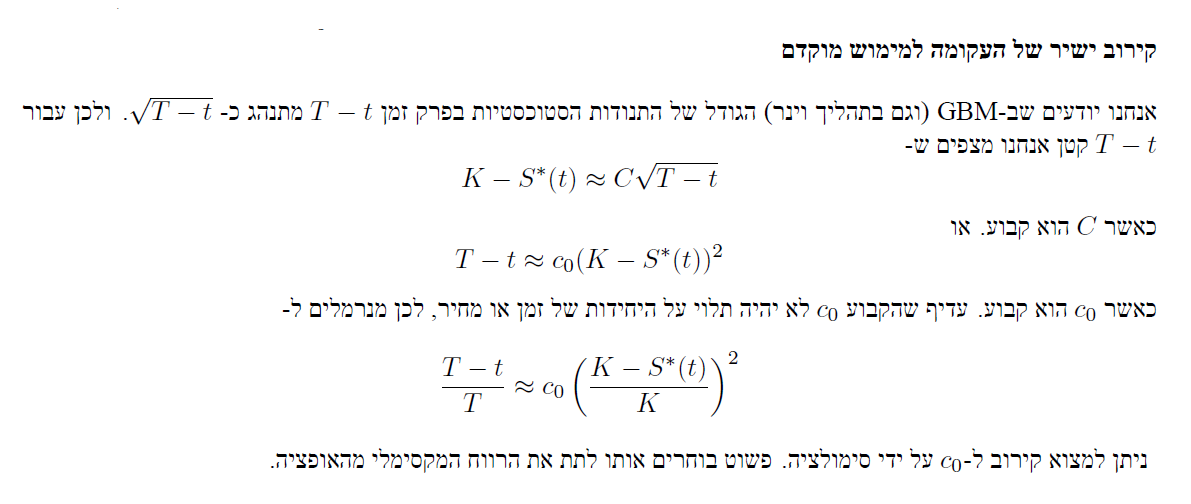

In [5]:
Image(filename='Andersen1.png')

In [6]:
# early exercise if  S < K  and (T-t)/T < c0*((K-S)/K)^2
def myval(c):
    val = np.zeros(M)
    for i in range(1,N+1):
        con1 = S[:,i] < K
        con2 = (T-i*h)/T <  c[0]*((K-S[:,i])/K)**2 
        val =  val + con1*con2*(val==0)*(np.exp(-i*h*r) * (K-S[:,i]))
    dd = np.mean(val)
    err = np.std(val)/np.sqrt(M)
    print(c,dd,err)    
    return(-dd)

In [7]:
c = fmin(myval, [3], ftol=0.001)

[3.] 0.0721222072891808 0.00048574515061458313
[3.15] 0.07259508953720872 0.0004867482072946446
[3.3] 0.07304372398610723 0.00048750024115089876
[3.45] 0.07351980471175082 0.0004884181388425805
[3.75] 0.07450763215672507 0.0004902203975395335
[4.05] 0.07546395656921057 0.0004913630339014568
[4.65] 0.07714611470536065 0.0004926344019268782
[5.25] 0.07880479653518396 0.0004940081300405279
[6.45] 0.08204636080661583 0.0004947682368149599
[7.65] 0.08465808044403071 0.0004921938008130282
[10.05] 0.08919708845392878 0.0004838697535562237
[12.45] 0.09321780002563382 0.0004729888601439093
[17.25] 0.09864010173212924 0.0004469101141711787
[22.05] 0.10239768677516631 0.000420278004838627
[31.65] 0.10648535755424658 0.0003704294108290843
[41.25] 0.10796415269025705 0.00032736075057981137
[60.45] 0.10811514193703724 0.0002577142817127503
[79.65] 0.10677845002517586 0.0002028665936783264
[79.65] 0.10677845002517586 0.0002028665936783264
[50.85] 0.10840688699219901 0.0002899383470828819
[41.25] 0.10

In [8]:
c[0]

46.32070312500011

In [9]:
# early exercise if  S < K  and (T-t)/T < c0*((K-S)/K)^2
def value1(c0):
    val = np.zeros(M)
    for i in range(1,N+1):
        con1 = S[:,i] < K
        con2 = (T-i*h)/T <  c0*((K-S[:,i])/K)**2
        val =  val + con1*con2*(val==0)*(np.exp(-i*h*r) * (K-S[:,i]))
    V = np.mean(val)
    SE = np.std(val)/np.sqrt(M)    
    print("price of the put option is: {:.4f}, with a stochastic error of {:.5f}".format(V,SE))

value1(c[0])

price of the put option is: 0.1085, with a stochastic error of 0.00031


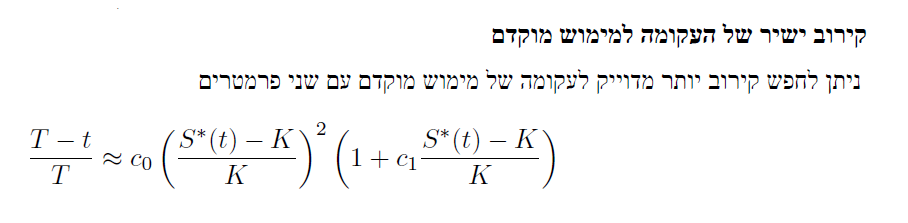

In [10]:
Image(filename='Andersen2.png')

In [11]:
# early exercise if  S < K  and  (T-t)/T < c0*((S-K)/K)^2 * (1+c1*(S-K)/K))
def myval(c):
    val = np.zeros(M)
    for i in range(1,N+1):
        con1 = S[:,i]<K
        con2 = (T-i*h)/T <  c[0]*(((S[:,i]-K)/K)**2) * (1+c[1]*(S[:,i]-K)/K) 
        val =  val + con1*con2*(val==0)*(np.exp(-i*h*r) * (K-S[:,i]))
    dd = np.mean(val)
    err = np.std(val)/np.sqrt(M)
    print(c,dd,err)    
    return(-dd)

In [12]:
c = fmin(myval, [3,0], ftol=0.001)

[3. 0.] 0.0721222072891808 0.00048574515061458313
[3.15 0.  ] 0.07259508953720872 0.0004867482072946446
[3.0e+00 2.5e-04] 0.07212333769435757 0.00048575191716553984
[3.15e+00 2.50e-04] 0.0725963608333042 0.0004867579379860125
[3.225e+00 3.750e-04] 0.0728197398231294 0.0004871813164086772
[3.375e+00 1.250e-04] 0.07325343468889563 0.0004878284919286388
[3.5625e+00 6.2500e-05] 0.07385492407236142 0.0004891070968477774
[3.6375e+00 4.3750e-04] 0.07411262154511487 0.0004895826606576267
[3.88125e+00 6.56250e-04] 0.07484602590264662 0.0004904480158198834
[4.21875e+00 3.43750e-04] 0.07594895081604776 0.0004915290133490954
[4.715625e+00 3.281250e-04] 0.07732494633488973 0.0004929030102865714
[5.034375e+00 9.218750e-04] 0.07820856798245356 0.0004936011138020767
[5.7703125e+00 1.3515625e-03] 0.08021078825519626 0.0004944707993481418
[6.6046875e+00 1.0234375e-03] 0.0824223439213273 0.0004946240747372154
[7.96640625e+00 1.20703125e-03] 0.08534705715757411 0.0004915103882234954
[9.02109375e+00 2.2304

In [13]:
c[0]

49.37202286678409

In [14]:
c[1]

0.014044645687332399

In [15]:
# early exercise if  S < K  and  (T-t)/T < c0*((S-K)/K)^2 * (1+c1*(S-K)/K))
def value2(c0,c1):
    val = np.zeros(M)
    for i in range(1,N+1):
        con1 = S[:,i] < K
        con2 = (T-i*h)/T <  c0*(((S[:,i]-K)/K)**2) * (1+c1*(S[:,i]-K)/K) 
        val =  val + con1*con2*(val==0)*(np.exp(-i*h*r) * (K-S[:,i]))
    V = np.mean(val)
    SE = np.std(val)/np.sqrt(M)    
    print("price of the put option is: {:.4f}, with a stochastic error of {:.5f}".format(V,SE))

value2(c[0],c[1])

price of the put option is: 0.1085, with a stochastic error of 0.00030


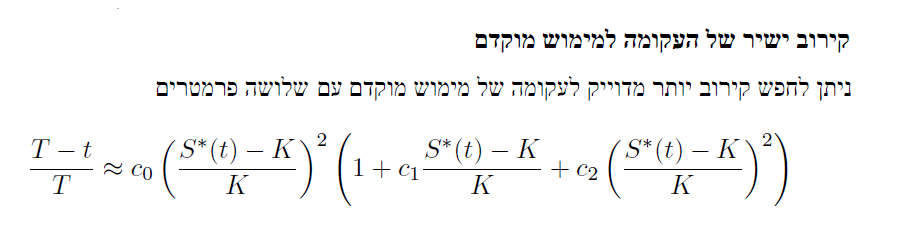

In [16]:
Image(filename='Andersen3.png')

In [17]:
# early exercise if  S < K  and  (T-t)/T < c0*((S-K)/K)^2 * (1 + c1*(S-K)/K + c2*((S-K)/K)^2)
def myval(c):
    val = np.zeros(M)
    for i in range(1,N+1):
        con1 = S[:,i]<K
        con2 = (T-i*h)/T <  c[0]*(((S[:,i]-K)/K)**2) * (1+c[1]*(S[:,i]-K)/K+c[2]*((S[:,i]-K)/K)**2)
        val =  val + con1*con2*(val==0)*(np.exp(-i*h*r) * (K-S[:,i]))
    dd = np.mean(val)
    err = np.std(val)/np.sqrt(M)
    print(c,dd,err)    
    return(-dd)

In [18]:
c = fmin(myval, [3,0,0], ftol=0.001)

[3. 0. 0.] 0.0721222072891808 0.00048574515061458313
[3.15 0.   0.  ] 0.07259508953720872 0.0004867482072946446
[3.0e+00 2.5e-04 0.0e+00] 0.07212333769435757 0.00048575191716553984
[3.0e+00 0.0e+00 2.5e-04] 0.07212315016159196 0.0004857522693523245
[3.10000000e+00 1.66666667e-04 1.66666667e-04] 0.0724412818850635 0.0004864585026066079
[ 3.16666667e+00  2.77777778e-04 -1.38888889e-04] 0.07263890350937363 0.0004868391674143111
[ 3.25000000e+00  4.16666667e-04 -3.33333333e-04] 0.07291532435489395 0.0004873971474498915
[ 3.33333333e+00  1.38888889e-04 -1.11111111e-04] 0.07309630411181196 0.0004874257832973008
[ 3.50000000e+00  8.33333333e-05 -1.66666667e-04] 0.07370021757435513 0.0004889704407578958
[ 3.50000000e+00  1.66666667e-04 -5.00000000e-04] 0.07370064164807558 0.0004889732509313885
[ 3.70000000e+00  1.66666667e-04 -8.33333333e-04] 0.07434376432429622 0.0004899547054664419
[ 3.81666667e+00  4.44444444e-04 -8.88888889e-04] 0.0747150751811814 0.0004904629901729705
[ 4.15000000e+00  6.

In [19]:
c[0]

49.45170305440348

In [20]:
c[1]

0.008030864505279749

In [21]:
c[2]

-0.055068264166263745

In [22]:
# early exercise if  S < K  and  (T-t)/T < c0*((S-K)/K)^2 * (1+c1*(S-K)/K))
def value3(c0,c1,c2):
    val = np.zeros(M)
    for i in range(1,N+1):
        con1 = S[:,i] < K
        con2 = (T-i*h)/T <  c0*(((S[:,i]-K)/K)**2) * (1+c1*(S[:,i]-K)/K+c2*((S[:,i]-K)/K)**2)
        val =  val + con1*con2*(val==0)*(np.exp(-i*h*r) * (K-S[:,i]))
    V = np.mean(val)
    SE = np.std(val)/np.sqrt(M)    
    print("price of the put option is: {:.4f}, with a stochastic error of {:.5f}".format(V,SE))

value3(c[0],c[1],c[2])

price of the put option is: 0.1085, with a stochastic error of 0.00030
